In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

In [3]:
import os
import torch

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [4]:
EXP_DATASETS = ['high_school_biology', 'high_school_chemistry', 'high_school_computer_science', 'high_school_european_history', 'high_school_geography', 'high_school_government_and_politics', 'high_school_macroeconomics', 'high_school_mathematics', 'high_school_microeconomics', 'high_school_physics', 'high_school_psychology', 'high_school_statistics', 'high_school_us_history', 'high_school_world_history']


In [6]:
from collections import defaultdict
from datasets import load_dataset

lengths = defaultdict(list)

for dataset_id in EXP_DATASETS:
    print(f"Processing {dataset_id}")
    dataset = load_dataset("cais/mmlu", dataset_id)
    for example in dataset["test"]:
        lengths[dataset_id].append(len(example["question"]))

Processing high_school_biology
Processing high_school_chemistry
Processing high_school_computer_science
Processing high_school_european_history
Processing high_school_geography
Processing high_school_government_and_politics
Processing high_school_macroeconomics
Processing high_school_mathematics
Processing high_school_microeconomics
Processing high_school_physics
Processing high_school_psychology
Processing high_school_statistics
Processing high_school_us_history
Processing high_school_world_history


In [7]:
for k,v in lengths.items():
    print(k, sum(v)/len(v))

high_school_biology 147.65806451612903
high_school_chemistry 129.39408866995075
high_school_computer_science 223.41
high_school_european_history 1391.0
high_school_geography 86.03030303030303
high_school_government_and_politics 96.56994818652849
high_school_macroeconomics 96.42051282051283
high_school_mathematics 149.72962962962964
high_school_microeconomics 100.5546218487395
high_school_physics 201.91390728476821
high_school_psychology 137.77798165137614
high_school_statistics 266.5416666666667
high_school_us_history 1204.4411764705883
high_school_world_history 1341.9915611814347


In [5]:
import json

results = []

for root, dirs, files in os.walk("../data/calibration"):
    for file in files:
        if file.endswith(".json"):
            with open(os.path.join(root, file), "r") as f:
                rf = json.load(f)
                results.append(rf)

In [7]:
results[0].keys()

dict_keys(['labels', 'probs', 'gts', 'logN_normalized_entropy', 'logD_normalized_entropy', 'NlogD_normalized_entropy', 'logNlogD_normalized_entropy', 'model', 'dataset', 'acc', 'ece', 'entropies'])

In [8]:
import pandas as pd

df = pd.DataFrame(results).drop_duplicates(["model", "dataset"])

for e in [
    "logN_normalized_entropy",
    "logD_normalized_entropy",
    "NlogD_normalized_entropy",
    "logNlogD_normalized_entropy",
    ]:
    df[f"last_{e}"] = df[e].apply(lambda x: x[-1])
    df["model"] = df["model"].apply(lambda x: x.split("/")[-1])

df = df[df["model"] != "Llama-2-13b-hf"]

print(df.shape)

(28, 16)


In [12]:
df.head(1)

,labels,probs,gts,logN_normalized_entropy,logD_normalized_entropy,NlogD_normalized_entropy,logNlogD_normalized_entropy,model,dataset,acc,...,logNlogD_normalized_entropy_23,logNlogD_normalized_entropy_24,logNlogD_normalized_entropy_25,logNlogD_normalized_entropy_26,logNlogD_normalized_entropy_27,logNlogD_normalized_entropy_28,logNlogD_normalized_entropy_29,logNlogD_normalized_entropy_30,logNlogD_normalized_entropy_31,logNlogD_normalized_entropy_32
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.8143518567227399, 0.06580971153065764, 0.0...","[2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 3, 1, 2, ...","[0.852599540413808, 0.8084454694654863, 0.0105...","[0.37695120917570046, 0.357694453803522, 0.004...","[0.010182428523328608, 0.009635608551100277, 0...","[0.10250342740160086, 0.09719502246891727, 0.0...",Llama-2-7b-hf,cais_mmlu-high_school_mathematics,0.292593,...,0.071637,0.074597,0.077043,0.079108,0.081334,0.083735,0.085858,0.088036,0.104565,0.092483


In [10]:
for e in [
    "logN_normalized_entropy",
    "logD_normalized_entropy",
    "NlogD_normalized_entropy",
    "logNlogD_normalized_entropy",
    ]:
    for i in range(len(df.iloc[0][e])):
        df[f"{e}_{i}"] = df[e].apply(lambda x: x[i]).copy()

/tmp/ipykernel_3911970/3980150154.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{e}_{i}"] = df[e].apply(lambda x: x[i]).copy()
/tmp/ipykernel_3911970/3980150154.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{e}_{i}"] = df[e].apply(lambda x: x[i]).copy()
/tmp/ipykernel_3911970/3980150154.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

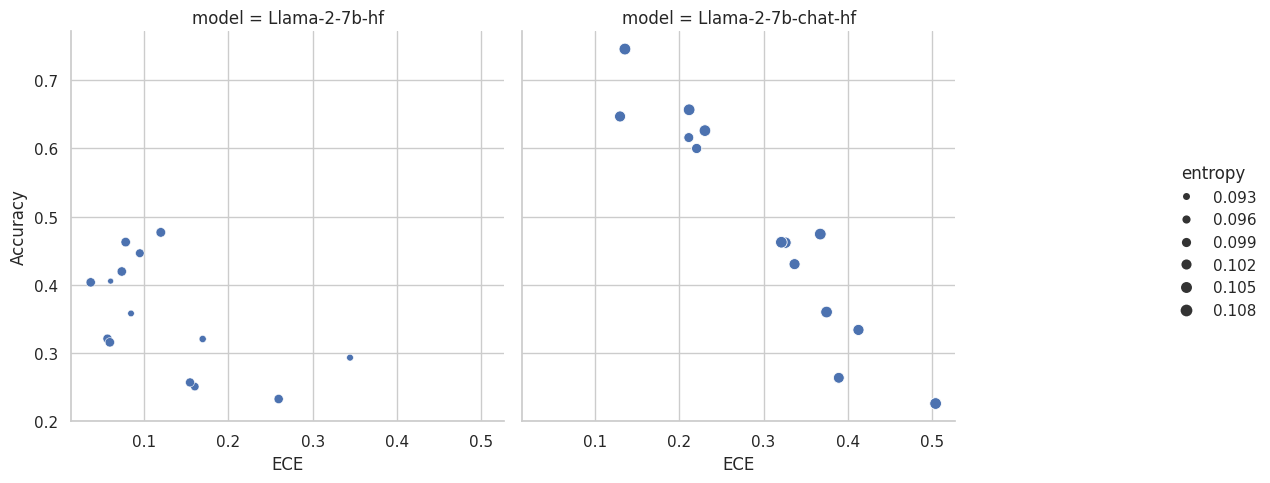

In [13]:
import seaborn as sns

sns.set_theme(style="whitegrid")

entropy = "logNlogD_normalized_entropy"
ax1 = sns.relplot(
    data=df,
    x="ece",
    y="acc",
    col="model",
    size=f"last_{entropy}",
    legend=True
)
ax1._legend.set_title('entropy')
ax1.set(xlabel='ECE', ylabel='Accuracy')

In [31]:
list(df["model"].unique())

['Llama-2-7b-hf', 'Llama-2-7b-chat-hf']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


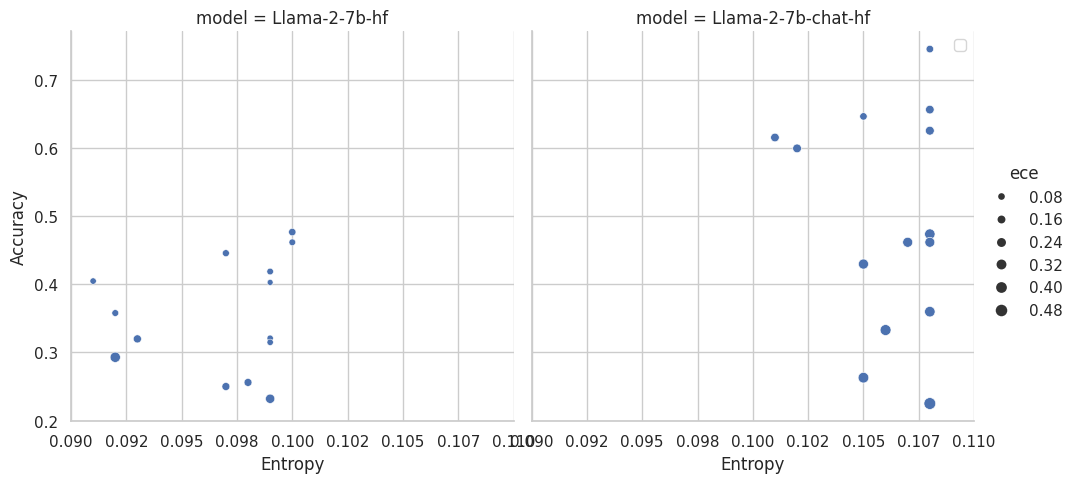

In [33]:
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

entropy = "logNlogD_normalized_entropy"

ax1 = sns.relplot(
    data=round(df, 3),
    x=f"last_{entropy}",
    y="acc",
    col="model",
    size="ece",
    legend=True
)

ax1._legend.set_title('ece')
ax1.set(xlabel='Entropy', ylabel='Accuracy')

ax1.set_xticklabels(['{:.3f}'.format(x) for x in ax1.axes[0][0].get_xticks()])

# # Add regression line
# for ax, model in zip(ax1.axes.flatten(), list(df["model"].unique())):
#     df_model = df[df["model"] == model]
#     sns.regplot(data=round(df_model, 3), x=f"last_{entropy}", y="acc", scatter=False, ax=ax)

plt.legend()


In [29]:
df_model

,labels,probs,gts,logN_normalized_entropy,logD_normalized_entropy,NlogD_normalized_entropy,logNlogD_normalized_entropy,model,dataset,acc,...,logNlogD_normalized_entropy_23,logNlogD_normalized_entropy_24,logNlogD_normalized_entropy_25,logNlogD_normalized_entropy_26,logNlogD_normalized_entropy_27,logNlogD_normalized_entropy_28,logNlogD_normalized_entropy_29,logNlogD_normalized_entropy_30,logNlogD_normalized_entropy_31,logNlogD_normalized_entropy_32


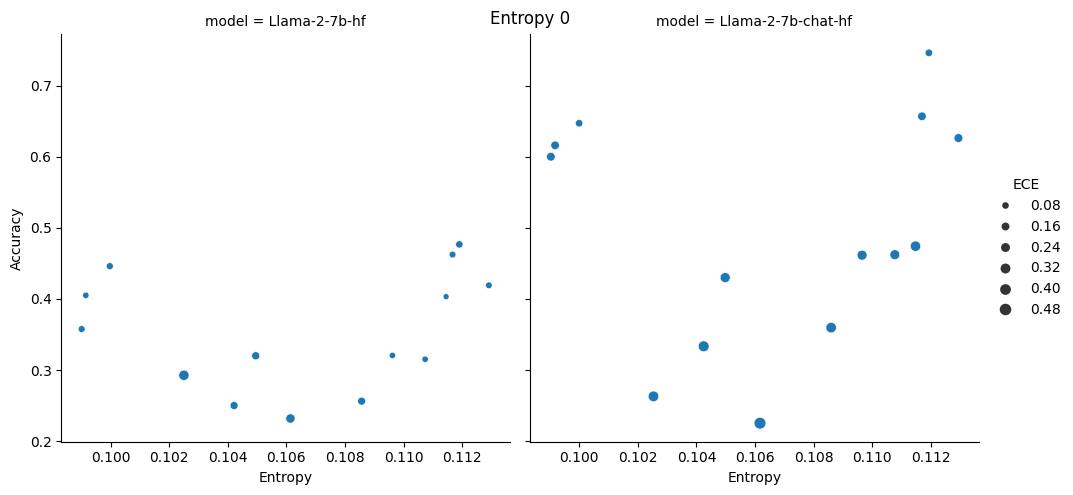

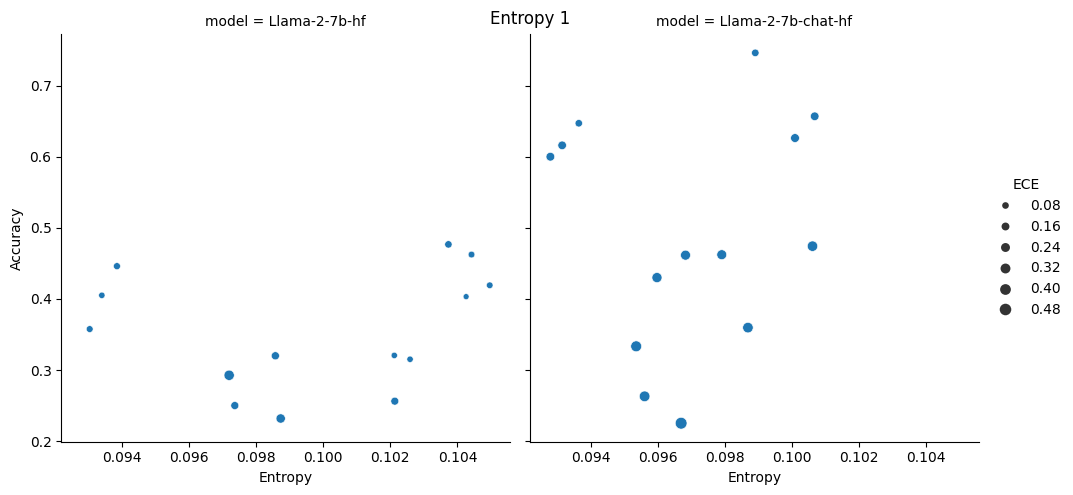

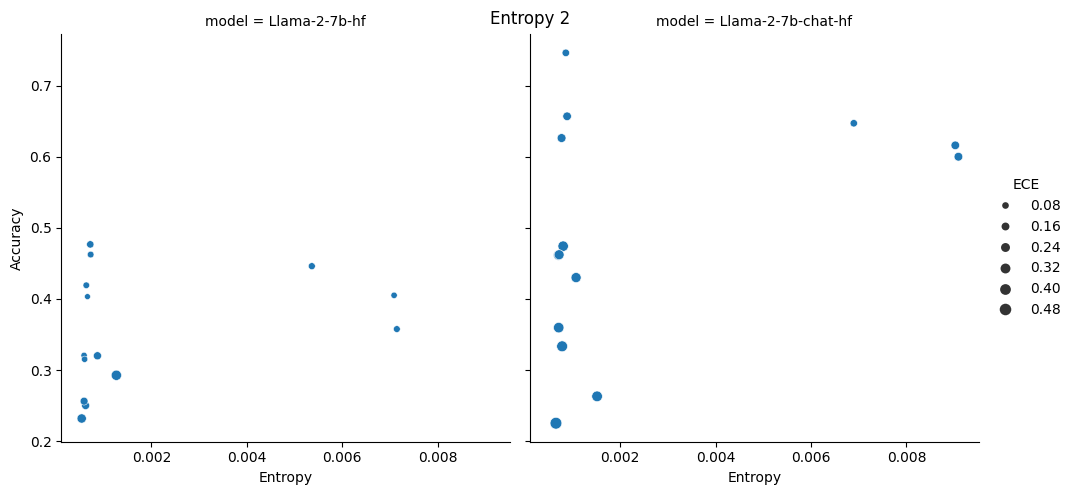

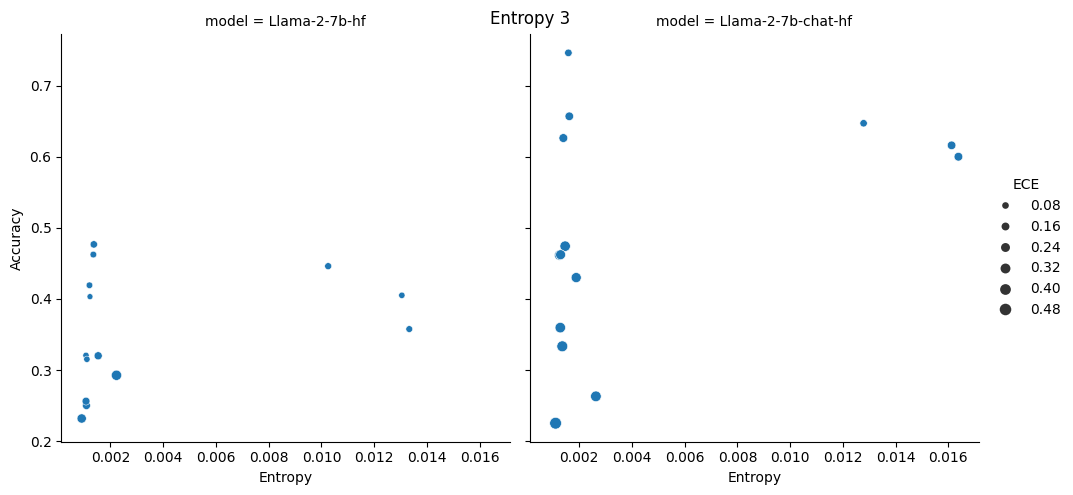

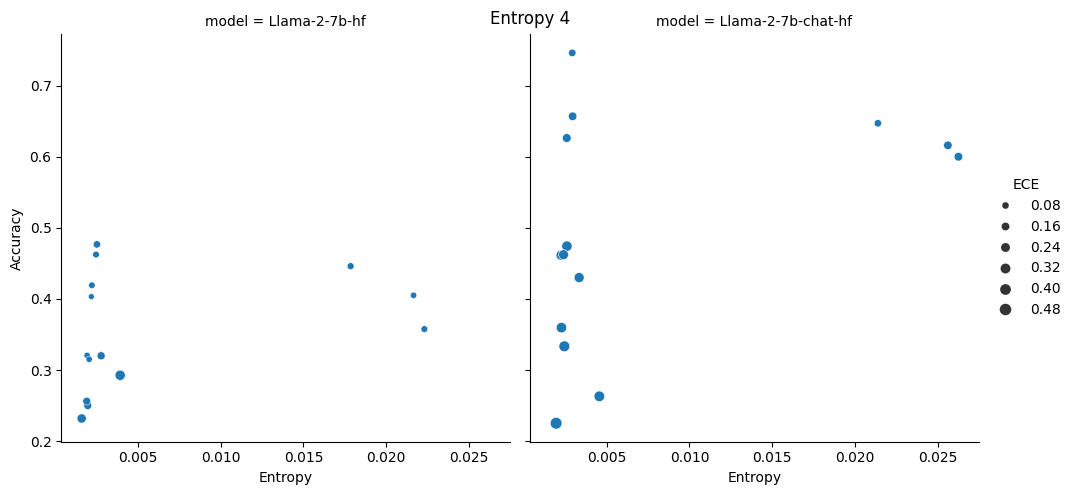

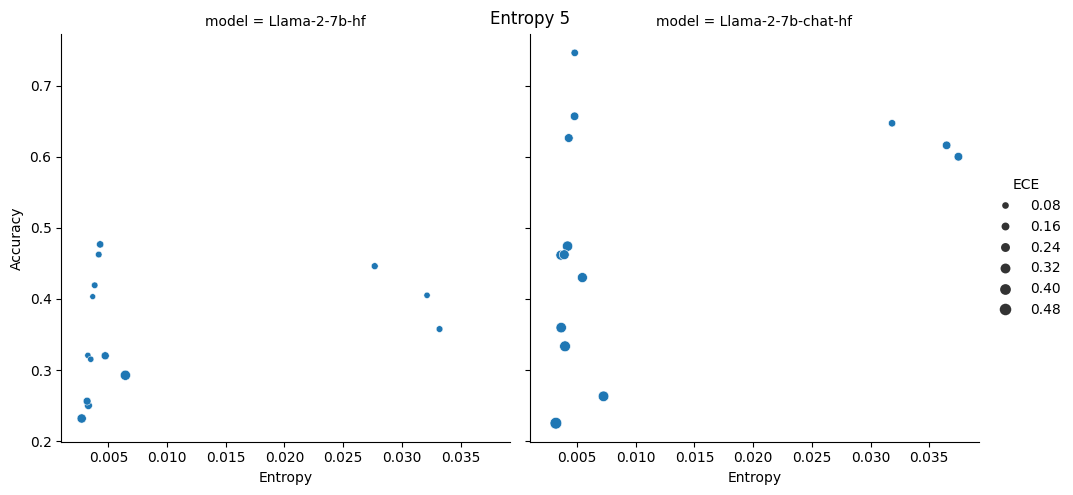

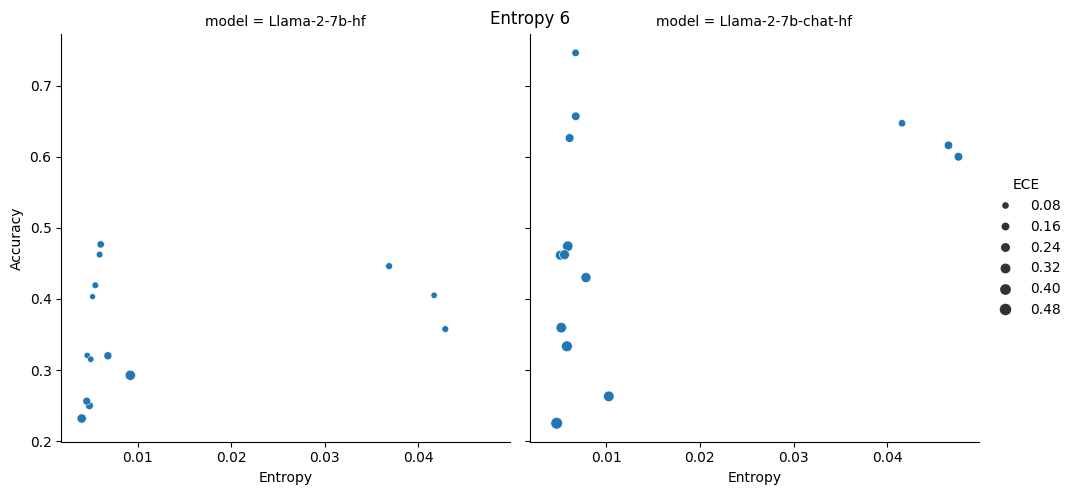

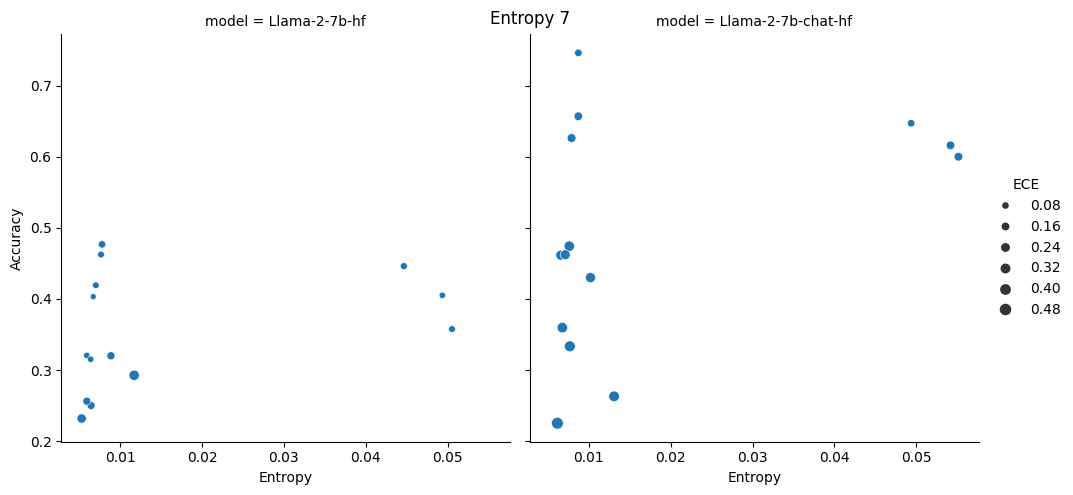

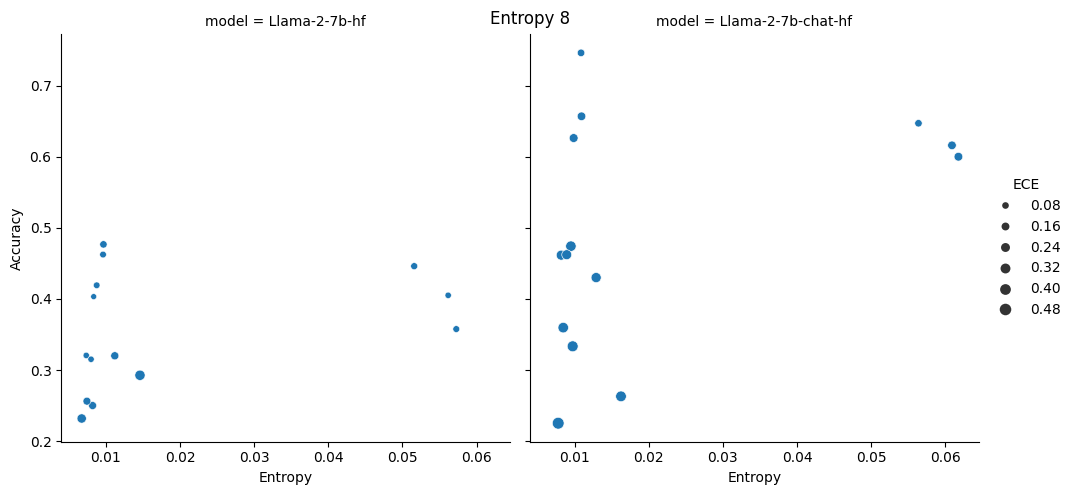

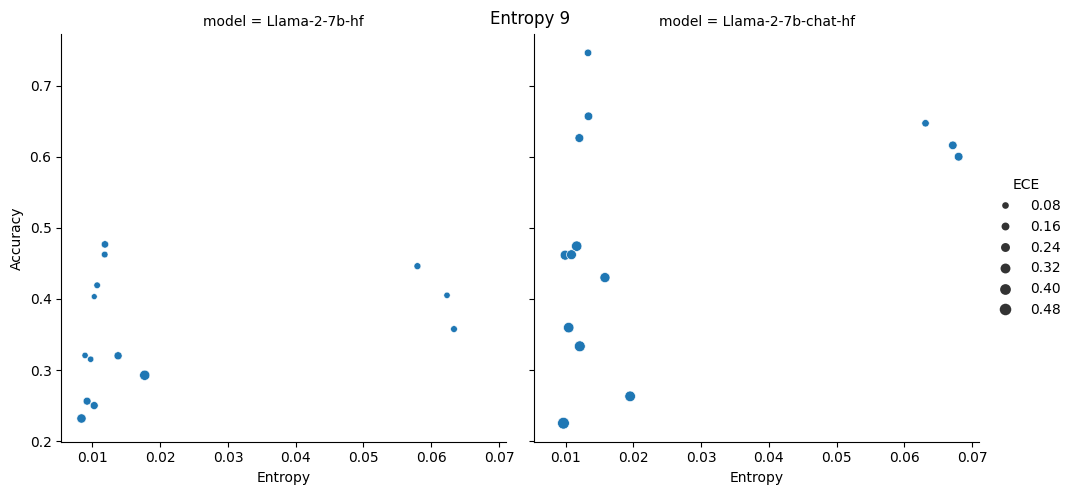

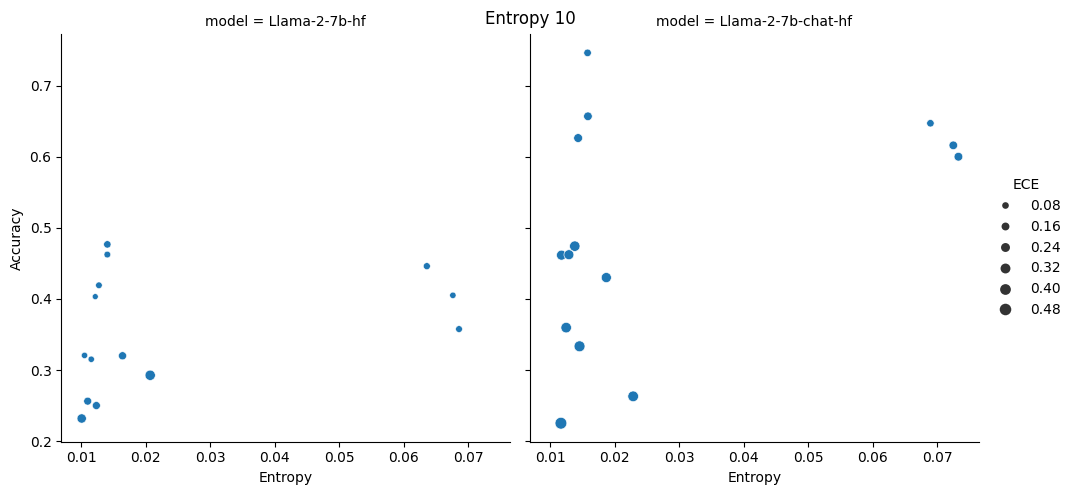

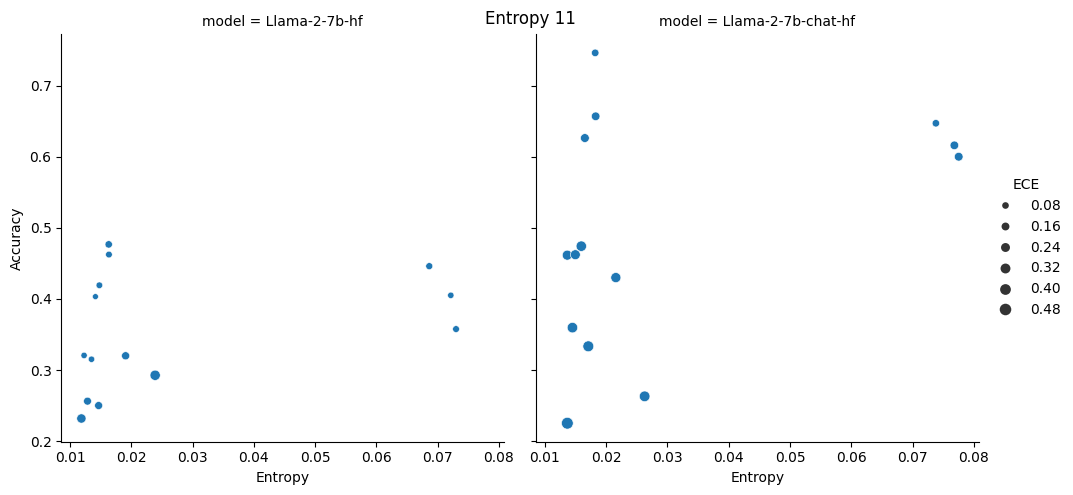

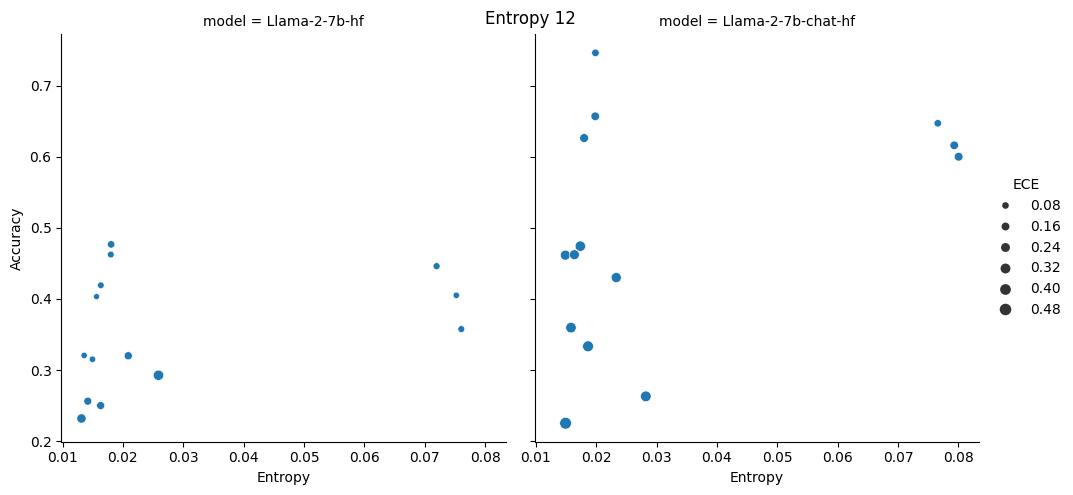

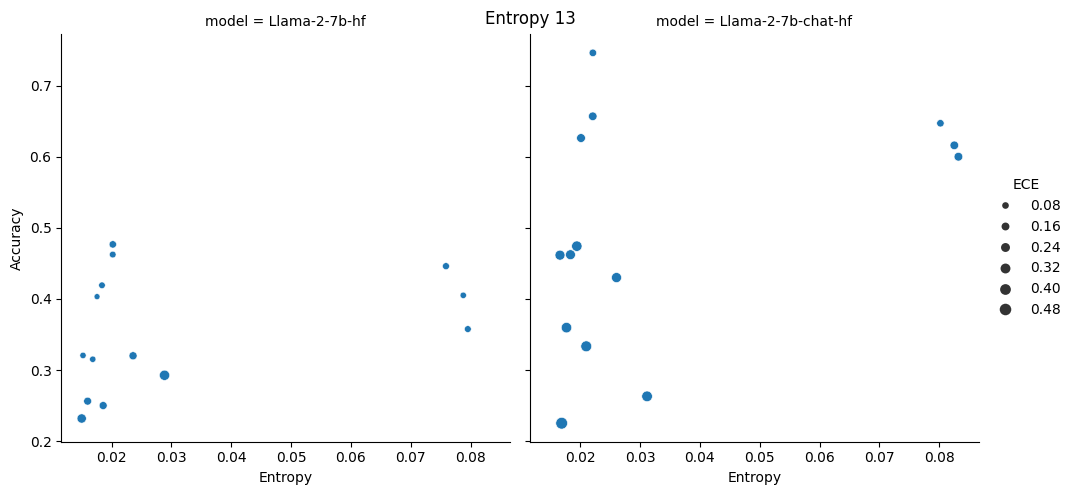

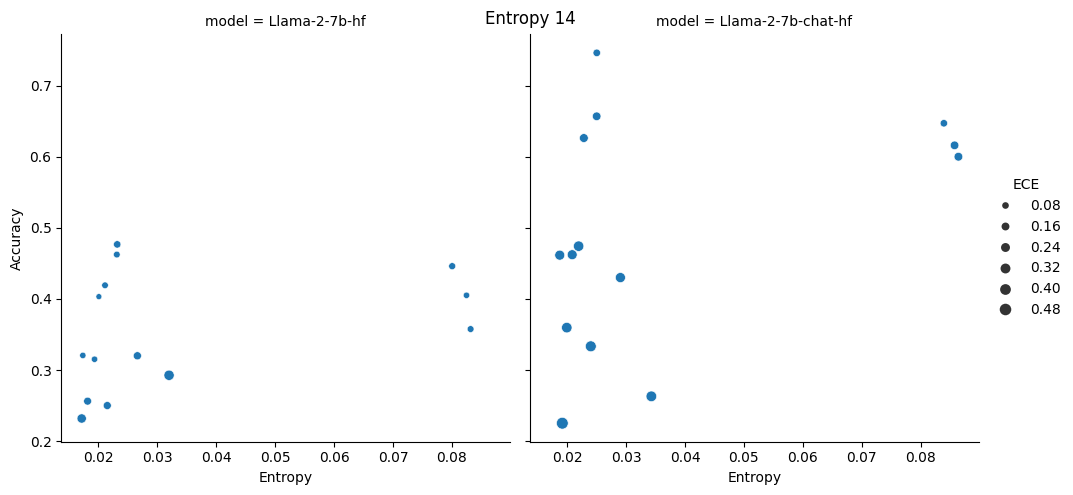

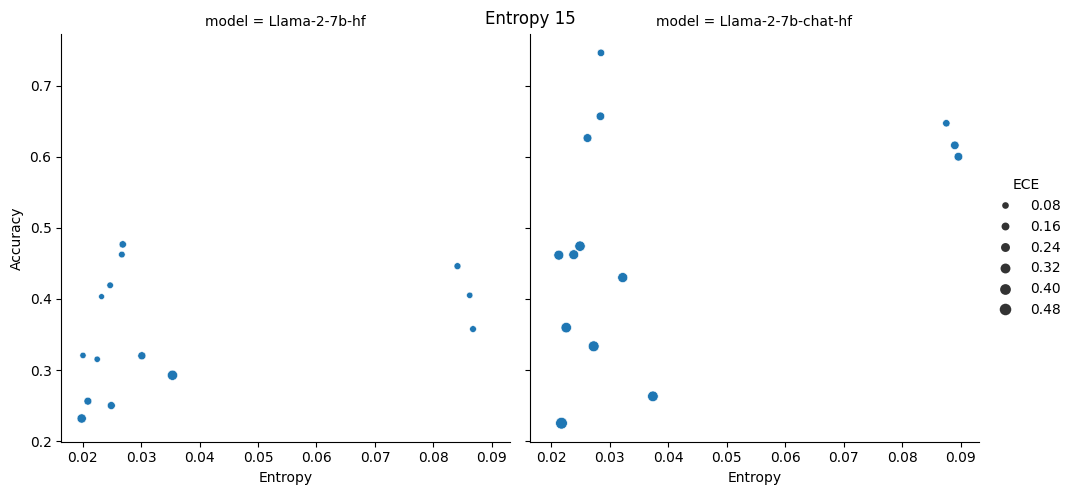

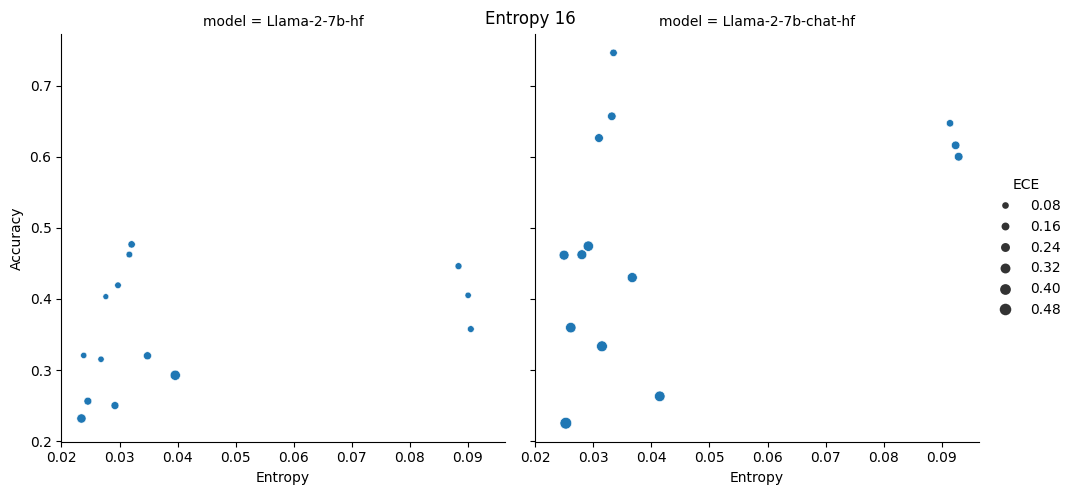

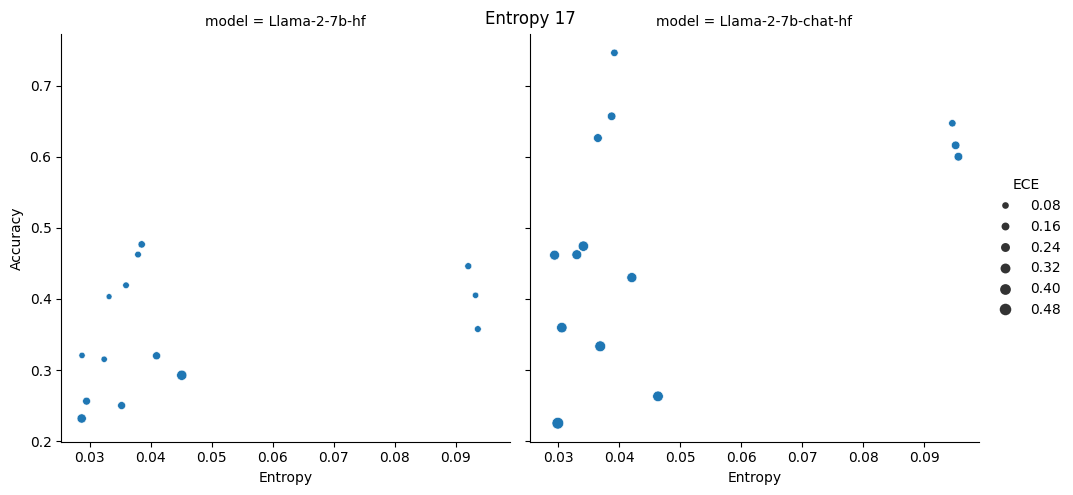

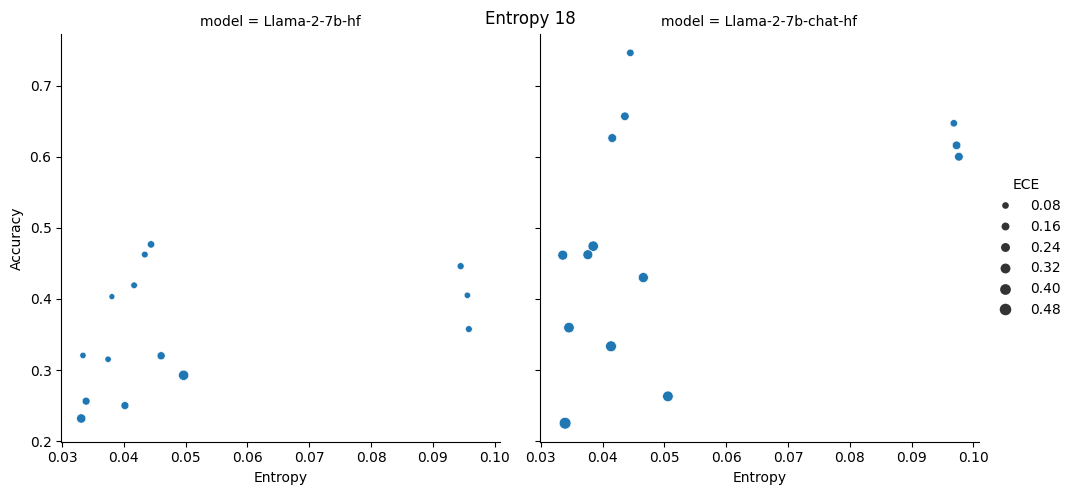

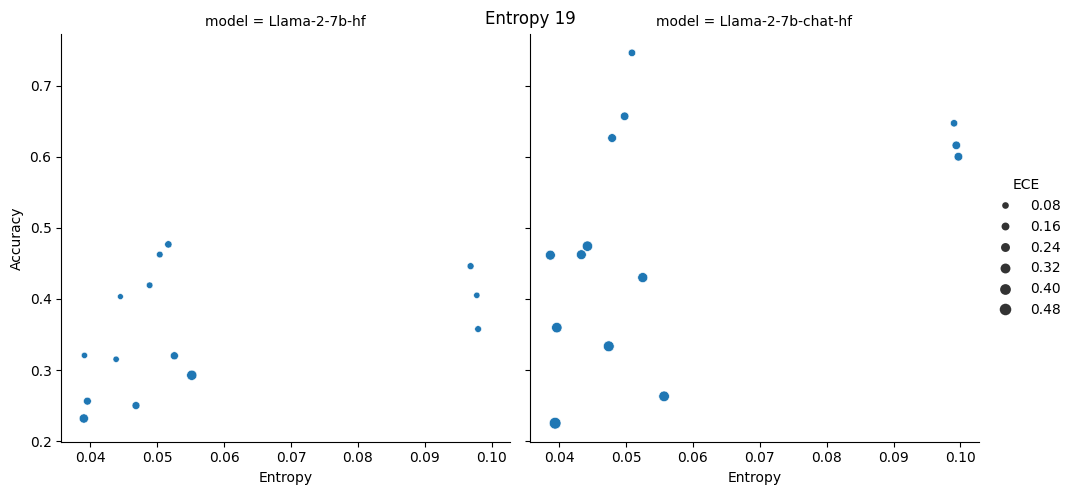

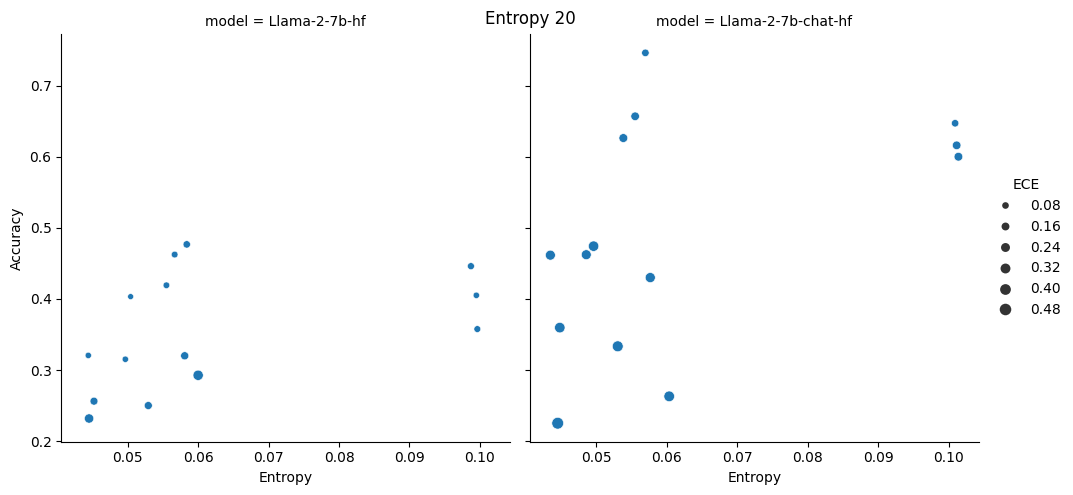

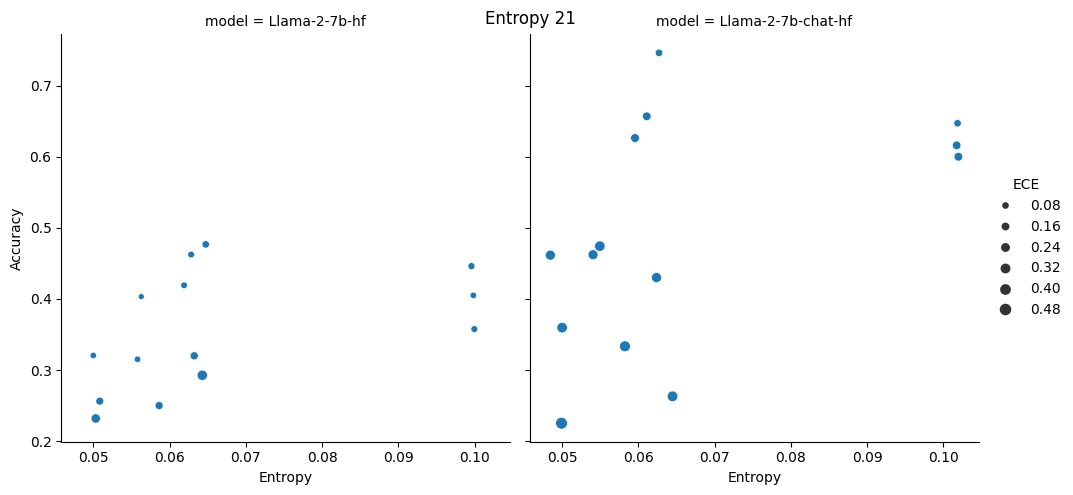

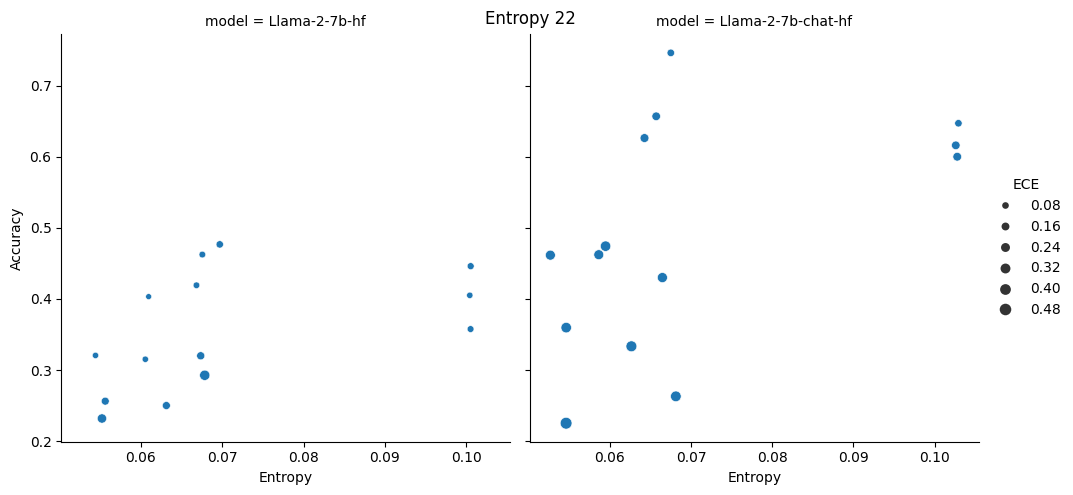

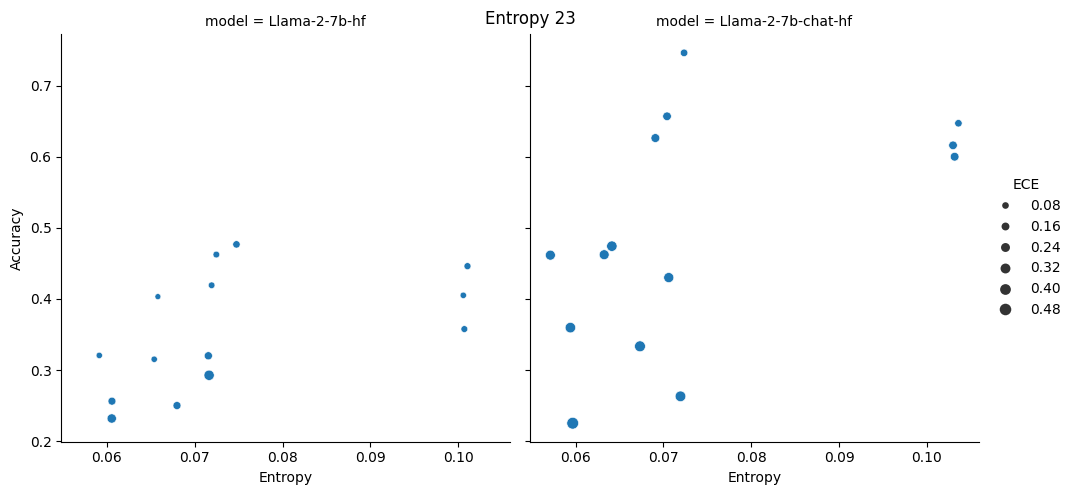

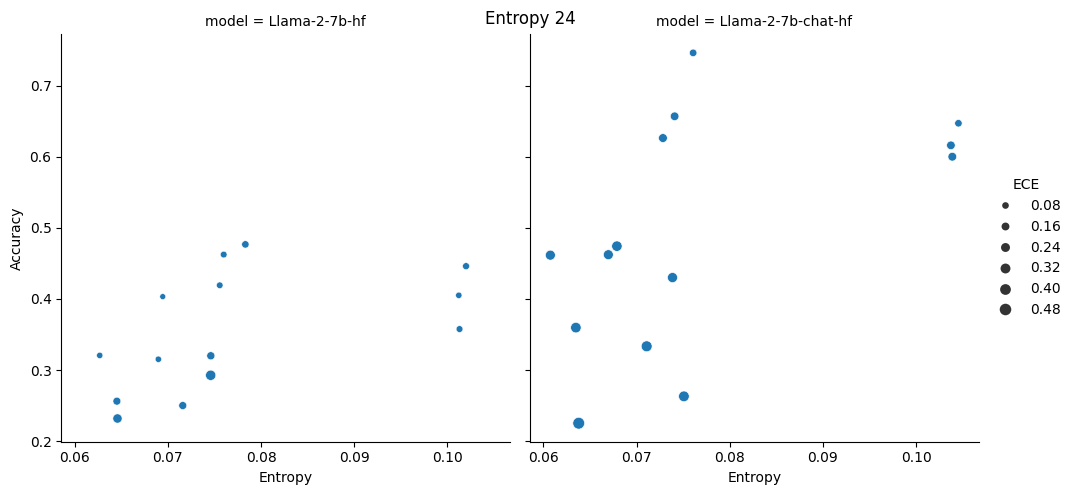

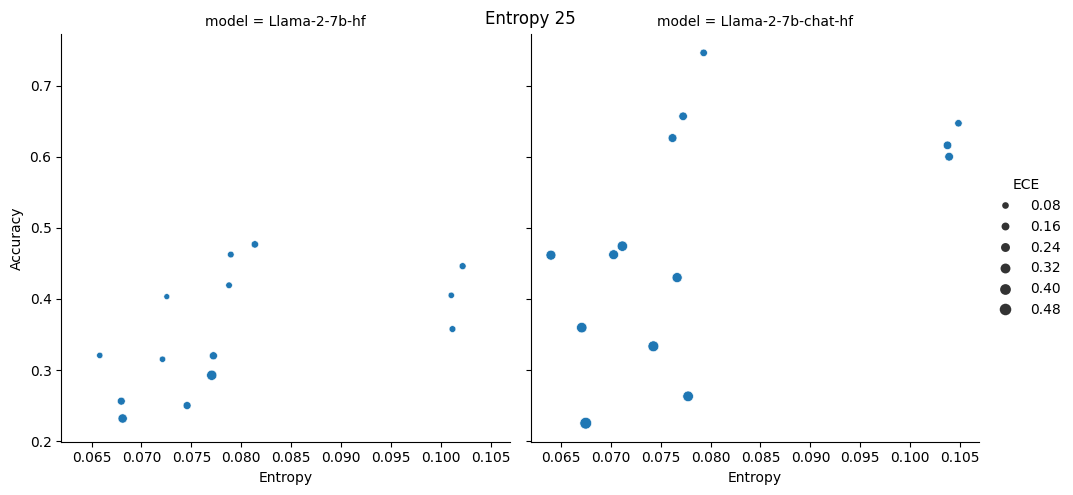

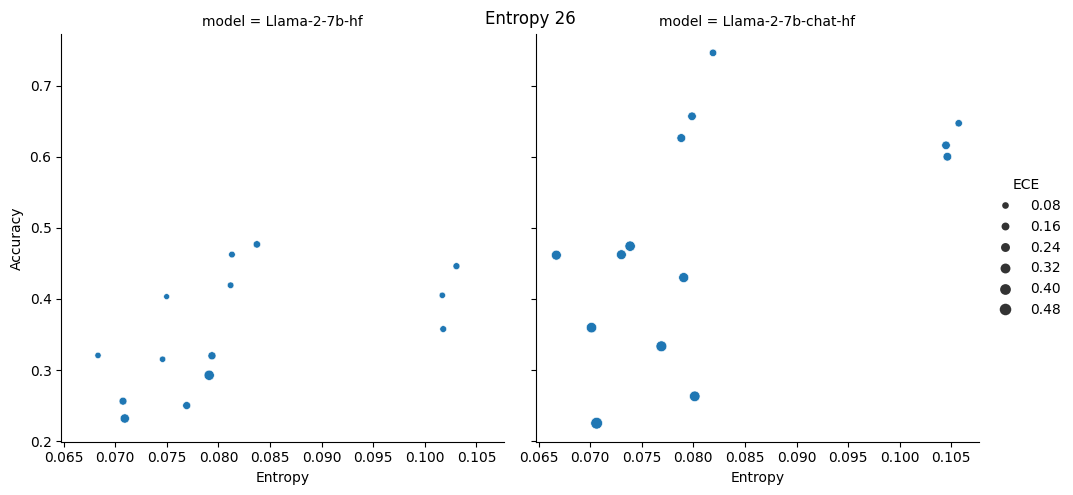

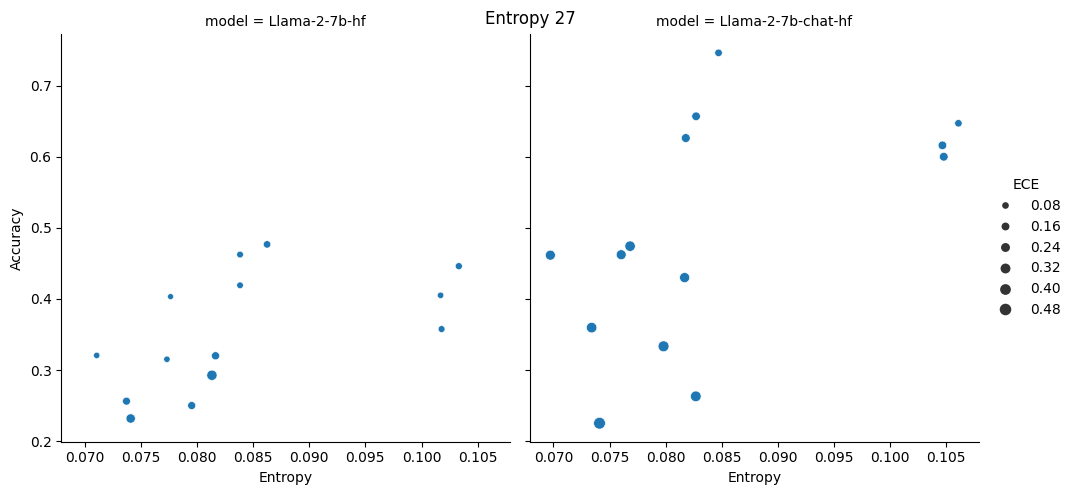

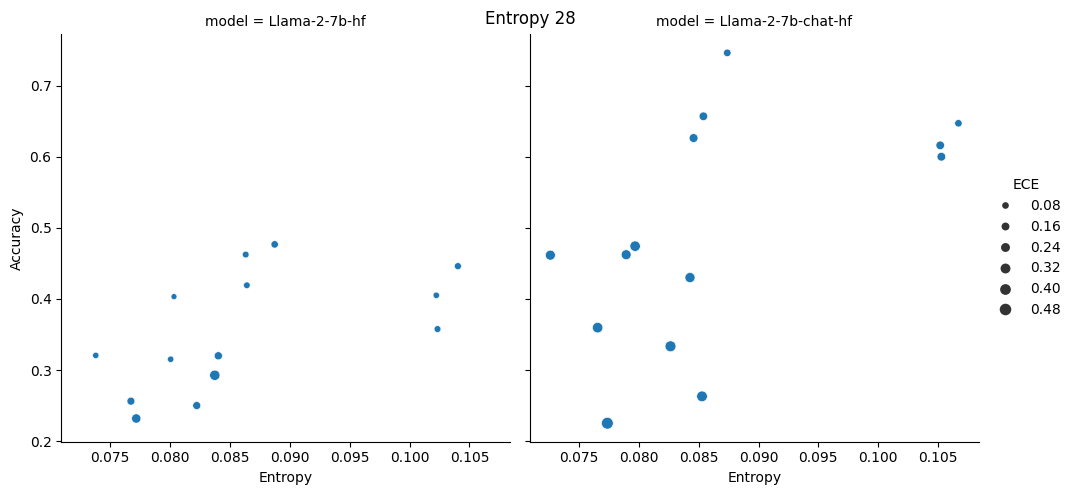

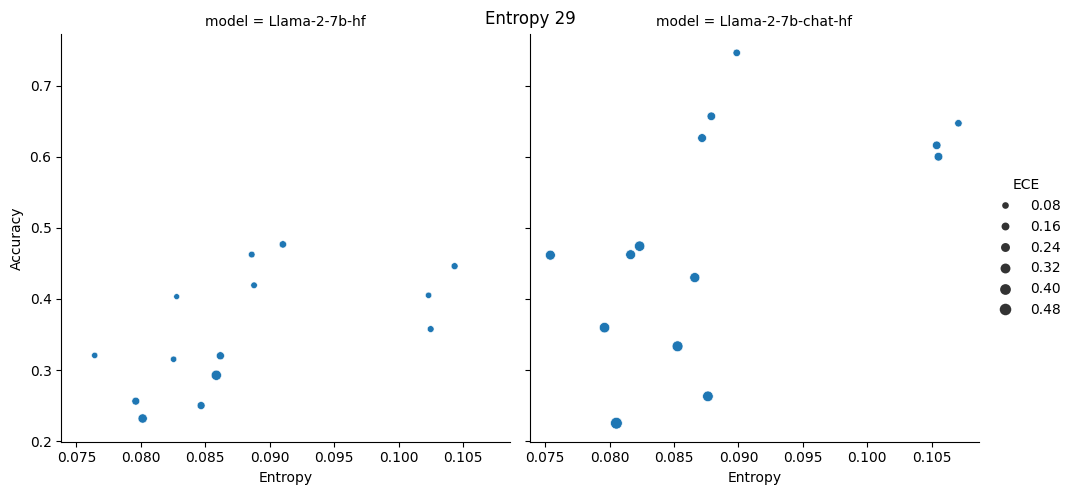

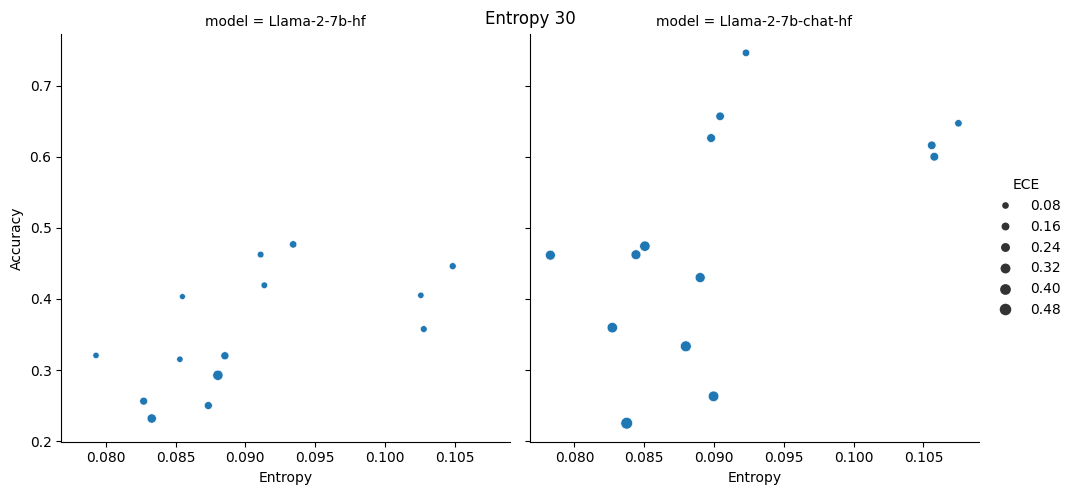

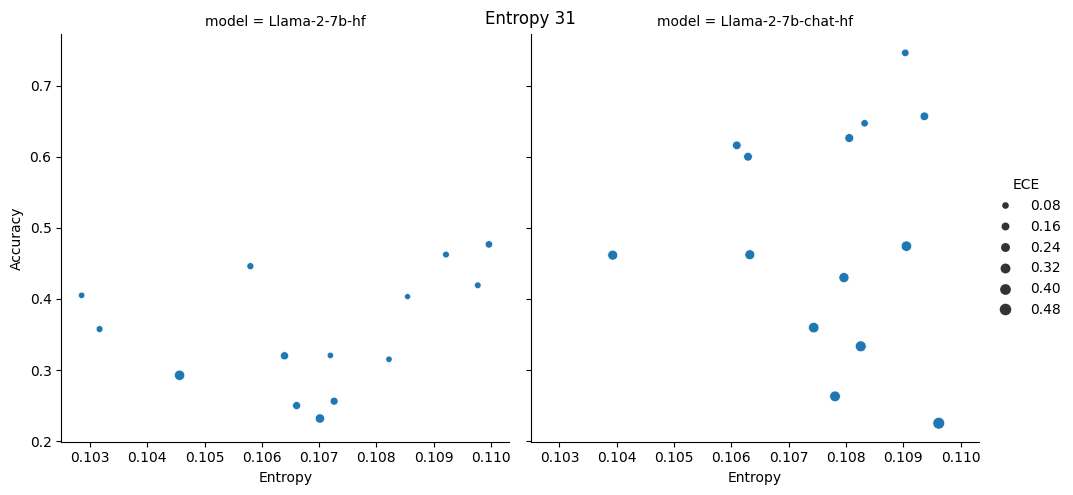

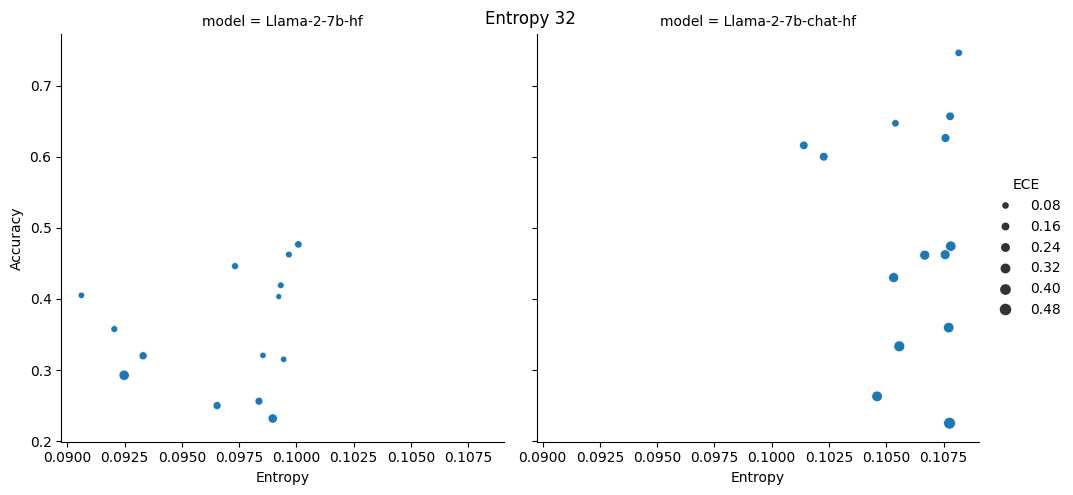

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

entropy = "logNlogD_normalized_entropy"

for i in range(len(df.iloc[0][entropy])):
    ax1 = sns.relplot(
        data=df,
        x=f"{entropy}_{i}",
        y="acc",
        col="model",
        size="ece",
        legend=True
    )
    ax1._legend.set_title('ECE')
    # set shared title for whole plot
    ax1.fig.suptitle(f"Entropy {i}")
    ax1.set(xlabel='Entropy', ylabel='Accuracy')
    plt.show()

In [14]:
entropy = "logNlogD_normalized_entropy"

long_df = df.explode(entropy)
long_df['hidden_state'] = long_df.groupby(['model', 'dataset']).cumcount()
long_df = long_df.rename(columns={entropy: 'entropy'})

min_size = 1
max_size = 5
long_df['size_acc'] = min_size + (long_df['acc'] - long_df['acc'].min()) / (long_df['acc'].max() - long_df['acc'].min()) * (max_size - min_size)
long_df['size_ece'] = min_size + (long_df['ece'] - long_df['ece'].min()) / (long_df['ece'].max() - long_df['ece'].min()) * (max_size - min_size)


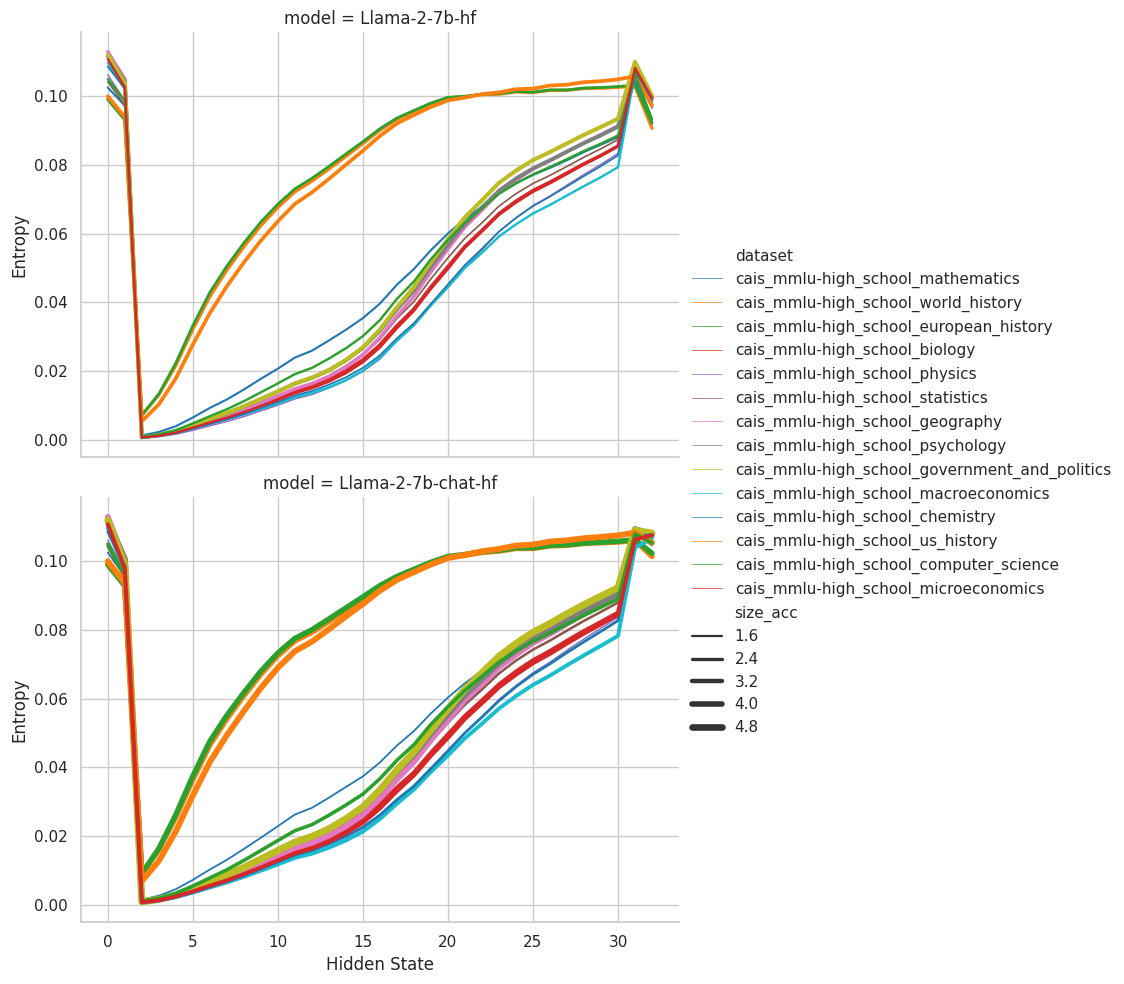

In [15]:
# Plot using Seaborn relplot
sns.set(style="whitegrid")

g = sns.relplot(
    data=long_df,
    x='hidden_state', y='entropy', hue='dataset', size='size_acc',
    kind='line', row='model', facet_kws={'sharey': True, 'sharex': True},
    palette='tab10', sizes=(min_size, max_size), height=5, aspect=1.5, linewidth=0.5,
    markers=True, dashes=False
)

g.set_axis_labels("Hidden State", "Entropy")
g.set_titles(col_template="{col_name} Model")

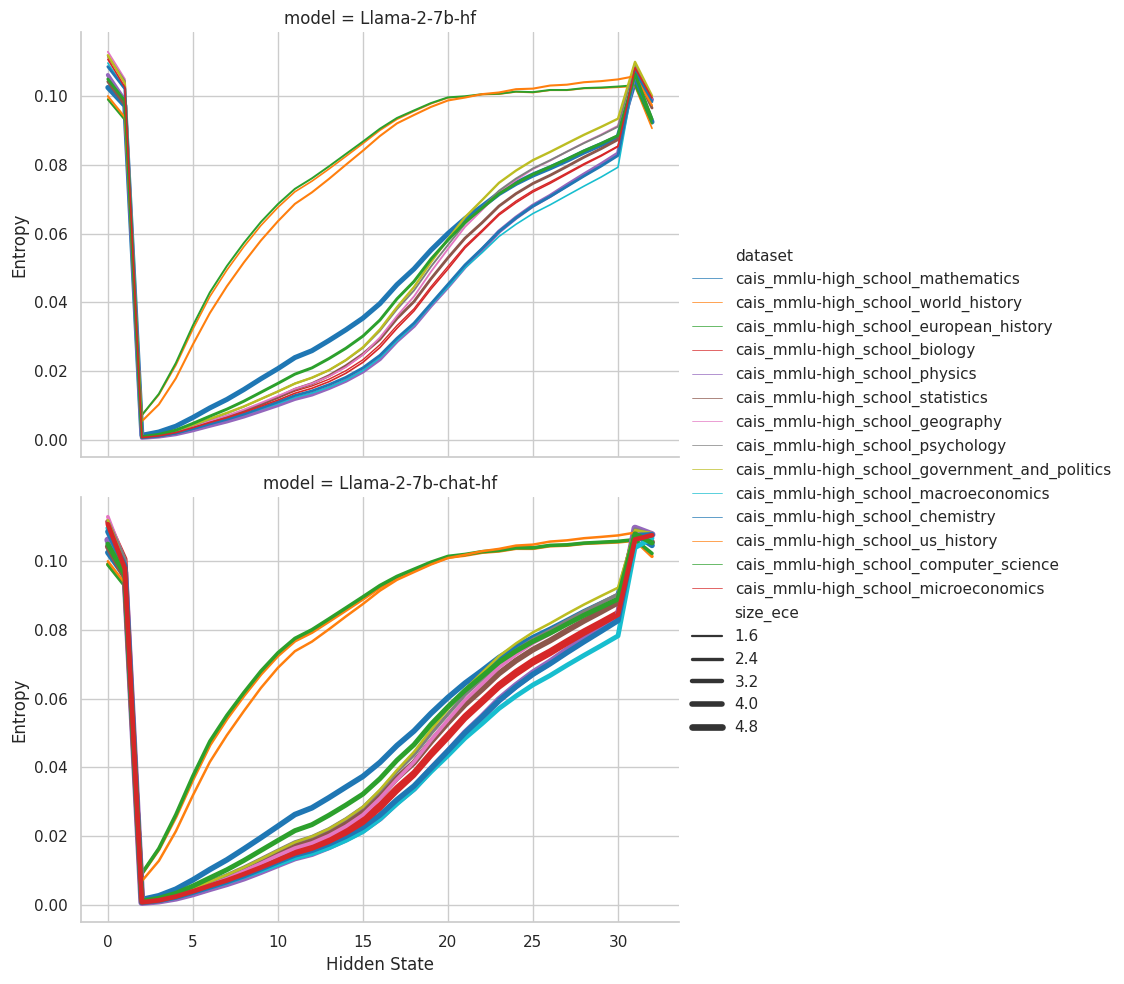

In [41]:
# Plot using Seaborn relplot
sns.set(style="whitegrid")

g = sns.relplot(
    data=long_df,
    x='hidden_state', y='entropy', hue='dataset', size='size_ece',
    kind='line', row='model', facet_kws={'sharey': True, 'sharex': True},
    palette='tab10', sizes=(min_size, max_size), height=5, aspect=1.5, linewidth=0.5
)

g.set_axis_labels("Hidden State", "Entropy")
g.set_titles(col_template="{col_name} Model")

# Analyze per record

In [90]:
import numpy as np
from tqdm import tqdm

new_df = df.copy()
data = []

for row in tqdm(new_df.itertuples()):
    for i in range(len(row.labels)):
        record = {
            "model": row.model,
            "dataset": row.dataset,
            "label": row.labels[i],
            "gt": row.gts[i],
            "probs": row.probs[i],
            "acc": row.acc,
            "ece": row.ece,
            "unnormalized_entropy": [],
        }
        for hstate_idx in range(len(row.entropies["unnormalized_entropy"])):
            record["unnormalized_entropy"].append(row.entropies["unnormalized_entropy"][f"hidden_state_{hstate_idx}"][i])
        
        record["logD_normalized_entropy"] = list(np.array(record["unnormalized_entropy"]) / np.log(row.entropies["embedding_dim"][i]))
        record["logNlogD_normalized_entropy"] = list(np.array(record["unnormalized_entropy"]) / (np.log(row.entropies["num_words"][i]) + np.log(row.entropies["embedding_dim"][i])))
        data.append(record)

0it [00:00, ?it/s]

28it [00:00, 92.54it/s]


In [91]:
new_df = pd.DataFrame(data)
new_df.shape

(6840, 10)

In [92]:
new_df.head()

,model,dataset,label,gt,probs,acc,ece,unnormalized_entropy,logD_normalized_entropy,logNlogD_normalized_entropy
0,Llama-2-7b-hf,cais_mmlu-high_school_mathematics,0,2,"[0.8143518567227399, 0.06580971153065764, 0.06...",0.292593,0.344282,"[2.5369296073913574, 2.3936357498168945, 0.008...","[0.30500131363899136, 0.28777386882961414, 0.0...","[0.23153878569277303, 0.21846073824385692, 0.0..."
1,Llama-2-7b-hf,cais_mmlu-high_school_mathematics,0,2,"[0.9626731114321387, 0.0, 0.0, 0.0373268885678...",0.292593,0.344282,"[2.705756425857544, 2.7043118476867676, 0.0070...","[0.32529844811984376, 0.3251247743062475, 0.00...","[0.23225435504519218, 0.23213035660684062, 0.0..."
2,Llama-2-7b-hf,cais_mmlu-high_school_mathematics,0,2,"[0.5405746597328742, 0.16486596113861113, 0.16...",0.292593,0.344282,"[3.234152317047119, 3.065699577331543, 0.00548...","[0.38882462577361915, 0.3685724647559674, 0.00...","[0.2752059386280021, 0.26087167425105057, 0.00..."
3,Llama-2-7b-hf,cais_mmlu-high_school_mathematics,0,1,"[0.774583386442152, 0.0, 0.22541661355784798, ...",0.292593,0.344282,"[2.702704668045044, 2.606703281402588, 0.01561...","[0.3249315517980031, 0.31338982476237515, 0.00...","[0.23998006012458173, 0.23145585146394243, 0.0..."
4,Llama-2-7b-hf,cais_mmlu-high_school_mathematics,0,0,"[0.8428192859929025, 0.0697254285492289, 0.087...",0.292593,0.344282,"[3.025528907775879, 2.911959171295166, 0.03208...","[0.3637429626095386, 0.3500890879748893, 0.003...","[0.2597027058425501, 0.24995420607113383, 0.00..."


In [93]:
new_df.groupby(['model', 'label']).count()

dataset    gt  probs   acc   ece  \
model              label                                     
Llama-2-7b-chat-hf 0          623   623    623   623   623   
                   1         1267  1267   1267  1267  1267   
                   2          958   958    958   958   958   
                   3          572   572    572   572   572   
Llama-2-7b-hf      0         2207  2207   2207  2207  2207   
                   1          389   389    389   389   389   
                   2          182   182    182   182   182   
                   3          642   642    642   642   642   

                          unnormalized_entropy  logD_normalized_entropy  \
model              label                                                  
Llama-2-7b-chat-hf 0                       623                      623   
                   1                      1267                     1267   
                   2                       958                      958   
                   3                       572                      572   
Llama-2-7b-hf      0                      2207                     2207   
                   1                       389                      389   
                   2                       182                      182   
                   3                       642                      642   

                          logNlogD_normalized_entropy  
model              label                               
Llama-2-7b-chat-hf 0                              623  
                   1                             1267  
                   2                              958  
                   3                              572  
Llama-2-7b-hf      0                             2207  
                   1                              389  
                   2                              182  
                   3                              642

In [96]:
entropy = "logNlogD_normalized_entropy"

long_df = new_df.explode(entropy)
long_df['hidden_state'] = np.tile(np.arange(33), len(long_df) // 33)
long_df = long_df.rename(columns={entropy: 'entropy'})
long_df["correct"] = long_df["label"] == long_df["gt"]

acc_map = long_df.groupby(['model', 'dataset'])['acc'].mean().to_dict()
ece_map = long_df.groupby(['model', 'dataset'])['ece'].mean().to_dict()

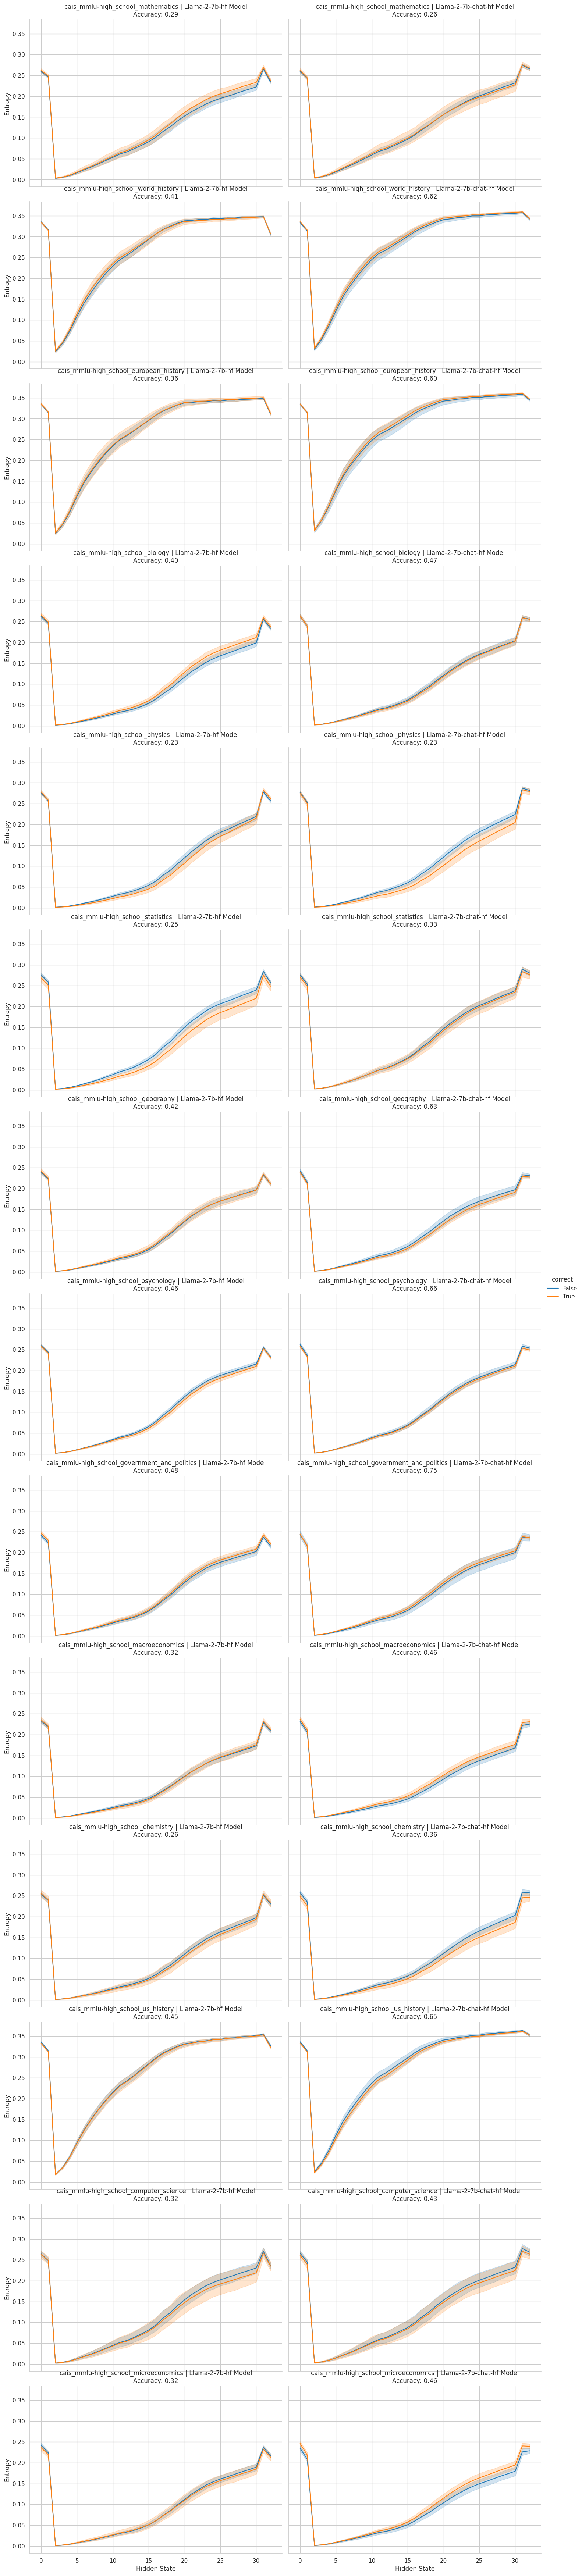

In [98]:
sns.set(style="whitegrid")

g = sns.relplot(
    data=long_df,
    x='hidden_state',
    y='entropy',
    hue='correct',
    col='model', 
    row='dataset',
    kind='line',
    palette='tab10',
    height=5,
    aspect=1.5,
    facet_kws={
        'sharey': True, 
        'sharex': True
    }
)

g.set_axis_labels("Hidden State", "Entropy")
g.set_titles(col_template="{col_name} Model", row_template="{row_name}")

for ax in g.axes.flat:
    dataset = ax.get_title().split('|')[0].strip()
    model = ax.get_title().split('|')[-1].strip().split(' ')[0]
    accuracy = acc_map.get((model, dataset), None)
    if accuracy is not None:
        ax.set_title(f"{dataset} | {model} Model\nAccuracy: {accuracy:.2f}")